## GRIP: The Sparks Foundation
### Data Science and Business Analytics Intern
### Author: Bhagyashree Patil
### Task 1: Prediction using Supervised ML 
### Predict the percentage of a student based on the number of study hours. What will be predicted score if a student studies for 9.25 hrs/ day?

### Importing required libraries

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as seab

### Loading file into dataframe

In [36]:
link="http://bit.ly/w-data"
df=pd.read_csv(link)

### Exploring data

In [37]:
df.shape   #indicates 25 rows and 2 columns

(25, 2)

In [38]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [39]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [40]:
df.info()     #indicates that there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Visualize the data

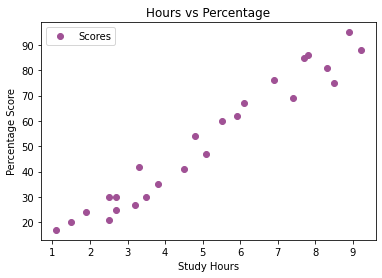

In [41]:
df.plot(style="o", x='Hours', y='Scores', color='#a05195')
plt.title('Hours vs Percentage')
plt.xlabel('Study Hours')  
plt.ylabel('Percentage Score')  
plt.show()

### Validating with Pearsons Correlation Coefficient

In [42]:
df.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:xlabel='Hours', ylabel='Count'>

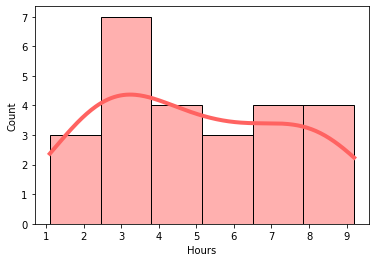

In [43]:
hours=df['Hours']
scores=df['Scores']
seab.histplot(x=hours,kde=True,line_kws={"linewidth":4},color='#ff6361')

<AxesSubplot:xlabel='Scores', ylabel='Count'>

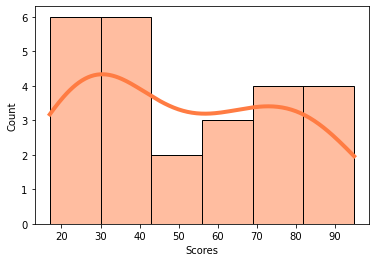

In [44]:
seab.histplot(x= scores,kde=True,line_kws={"linewidth":4},color='#ff7c43')

### Separate feature(s) and target

In [45]:
x=df.iloc[:, :-1].values  
y=df.iloc[:, 1].values

### Split into Train and Test

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

### Model building

In [47]:
from sklearn.linear_model import LinearRegression  
regr=LinearRegression()  
regr.fit(x_train, y_train) 

LinearRegression()

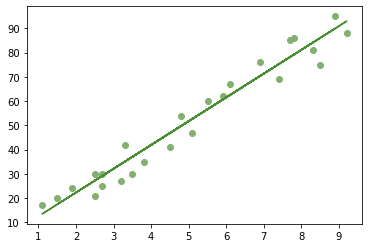

In [48]:
a=regr.coef_
b=regr.intercept_
line=a*x+b

# Plotting for the test data
plt.scatter(x,y,color='#83af70')
plt.plot(x, line, color='#488f31')
plt.show()

In [49]:
y_pred=regr.predict(x_test)

In [50]:
analysis=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
analysis

,Actual,Predicted
0,20,17.371423
1,47,52.702923
2,42,35.037173
3,27,34.055743
4,41,46.814340


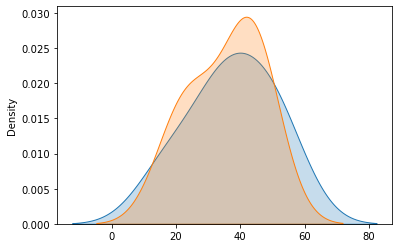

In [51]:
#Predicted vs Actual plot
seab.kdeplot(y_pred, label='Predicted', shade=True);
seab.kdeplot(y_test, label='Actual', shade=True);

In [52]:
#Checking the accuracy of the model using score
print('Train accuracy: ', regr.score(x_train, y_train), '\nTest accuracy: ', regr.score(x_test, y_test))

Train accuracy:  0.95807022445042 
Test accuracy:  0.6683995499740194


In [53]:
#Predicted score if a student studies for 9.25 hrs/ day
h=9.25
q=regr.predict([[h]])
print("If a student studies for {} hours per day he/she will score {}% in exams.".format(h,q))

If a student studies for 9.25 hours per day he/she will score [93.43229054]% in exams.


In [54]:
#Determining amount of error
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 5.632881746692995
